# Open Webcam and take photo

In [1]:
import cv2

In [2]:
# 設定從哪顆鏡頭讀取影像，在括弧中填入先前查詢到的webcam編號
webcam = cv2.VideoCapture(0)
# 讀取影像
return_value, image = webcam.read()
# 儲存名為Picture.png的照片
cv2.imwrite("Picture.png", image)
# 刪除webcam，避免影像佔用資源
del(webcam)

In [3]:
#開啟視窗顯示影像
#cv2.imshow('Picture.png', image)
# 不刷新影像
#cv2.waitKey(0)
# 釋放資源
#cv2.destroyAllWindows()

# Read, edit, show photo

In [4]:
import cv2
import numpy as np

In [5]:
# 讀取影像
img = cv2.imread('Picture.png')
# 將影像轉換為灰階
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

In [6]:
# 存檔
cv2.imwrite('img_gray.jpg',img_gray)

True

In [7]:
# 開啟視窗顯示影像
#cv2.imshow('img_gray',img_gray)
# 不刷新影像
#cv2.waitKey(0)
# 釋放資源
#cv2.destroyAllWindows()

# Extract color

In [8]:
import cv2
import numpy as np

In [9]:
# 讀取圖片
img = cv2.imread('Picture.png')

# OpenCV的顏色預設是BGR格式，這邊將其轉換為HSV格式
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 以HSV格式決定要提取的顏色範圍，White
lower = np.array([0,0,221])
upper = np.array([180,255,255])

# 將HSV影像的閾值設定為想要提取的顏色
mask = cv2.inRange(hsv, lower, upper)

# 使用bitwise_and()合併掩膜(mask)和原來的影像
img_specific = cv2.bitwise_and(img,img, mask= mask)

In [10]:
# 存檔
cv2.imwrite('img_specific.jpg', img_specific)

True

In [11]:
# 展示原圖、掩膜、抽取顏色後的影像
#cv2.imshow('img',img)
#cv2.imshow('mask',mask)
#cv2.imshow(' img_specific ', img_specific)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Image overlay and color drawing

In [12]:
import cv2
import numpy as np

In [13]:
# 讀取影像
img_gray = cv2.imread('img_gray.jpg')
img_specific = cv2.imread('img_specific.jpg')

In [14]:
# 將提取顏色的影像轉換為灰階
img_specific_gray = cv2.cvtColor(img_specific,cv2.COLOR_BGR2GRAY)  

# 下方數字50為閾值，可修改閾值範圍(0~255)來調整掩膜區域，並轉換為二元影像
ret, mask = cv2.threshold(img_specific_gray,50, 255, cv2.THRESH_BINARY)

# 將掩膜反相
mask_inv = cv2.bitwise_not(mask)

# 使用bitwise_and()和掩膜從灰階圖中排除已被提取顏色的區域
img_gray_bg = cv2.bitwise_and(img_gray,img_gray,mask = mask_inv)


# 使用bitwise_and()和掩膜設定提取顏色的區域
img_specific_fg = cv2.bitwise_and(img_specific,img_specific,mask = mask)

# 使用add()將兩張圖片疊加
img_result = cv2.add(img_gray_bg,img_specific_fg)

# 存檔並展示
cv2.imwrite(' img_result.jpg', img_result)
cv2.imshow(' img_result ', img_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Road Line

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#img_result = cv2.imread(' img_result.jpg')

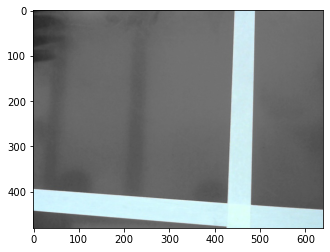

In [17]:
img = cv2.imread(' img_result.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

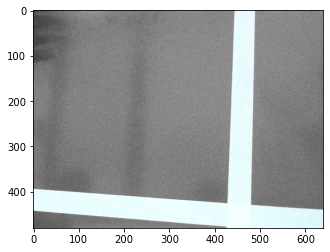

In [18]:
noised = (img + 0.2 * np.random.rand(*img.shape).astype(np.float32))
noised = noised.clip(0, 1)
plt.imshow(noised[:,:,[0,1,2]])
plt.show()

cv2.imshow("noised", noised)
cv2.waitKey(0)
cv2.destroyAllWindows()

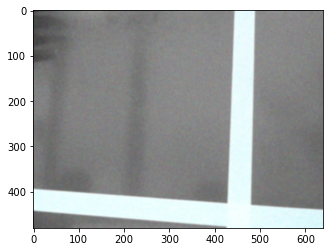

In [19]:
#gauss_blur = cv2.GaussianBlur(noised, (7, 7), 0)

gauss_blur = cv2.GaussianBlur(noised, (7, 7), 0)
plt.imshow(gauss_blur[:, :, [0, 1, 2]])
plt.show()
cv2.imshow("gauss_blur", gauss_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# np.max(gauss_blur*255)
gauss_blur = gauss_blur*255
gauss_blur = gauss_blur.astype(np.uint8)
# np.max(gauss_blur.astype(np.uint8))

In [21]:
gray = cv2.cvtColor(gauss_blur,cv2.COLOR_BGR2GRAY)  
edges = cv2.Canny(gray, 50, 200)
lines = cv2.HoughLinesP(edges, 1.0, np.pi/180, 100, minLineLength=1, maxLineGap=250)

In [22]:
cv2.imshow("Result Image", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result


In [24]:
# Show result
cv2.imshow("Result Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()